**House Price Linear Regression**

Your neighbor is a real estate agent and wants some help predicting housing prices for regions in the USA. It would be great if you could somehow create a model for her that allows her to put in a few features of a house and returns back an estimate of what the house would sell for.
She has asked you if you could help her out with your new data science skills. You say yes, and decide that Linear Regression might be a good path to solve this problem!
Your neighbor then gives you some information about a bunch of houses in regions of the United States, it is all in the data set: USA_Housing.csv.

The data contains the following columns:

'Avg. Area Income': Avg. Income of residents of the city house is located in.

'Avg. Area House Age': Avg Age of Houses in same city 'Avg. ‘

'Area Number of Rooms': Avg Number of Rooms for Houses in same city 'Avg.

'Area Number of Bedrooms': Avg Number of Bedrooms for Houses in same city.

'Area Population': Population of city house is located in

'Price': Price that the house sold at

'Address': Address for the house.

# Import Libraries

In [130]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn import metrics


# Import dataset

In [131]:
house=pd.read_csv("/content/USA_Housing.csv")

In [132]:
data=house.copy()

# Data Understanding

In [133]:
data.head()

,Avg. Area Income,Avg. Area House Age,Avg. Area Number of Rooms,Avg. Area Number of Bedrooms,Area Population,Price,Address
0,79545.458574,5.682861,7.009188,4.09,23086.800503,1.059034e+06,"208 Michael Ferry Apt. 674\nLaurabury, NE 3701..."
1,79248.642455,6.002900,6.730821,3.09,40173.072174,1.505891e+06,"188 Johnson Views Suite 079\nLake Kathleen, CA..."
2,61287.067179,5.865890,8.512727,5.13,36882.159400,1.058988e+06,"9127 Elizabeth Stravenue\nDanieltown, WI 06482..."
3,63345.240046,7.188236,5.586729,3.26,34310.242831,1.260617e+06,USS Barnett\nFPO AP 44820
4,59982.197226,5.040555,7.839388,4.23,26354.109472,6.309435e+05,USNS Raymond\nFPO AE 09386


In [134]:
#see how many rows and columns are in the dataset
data.shape

(5000, 7)

In [135]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 7 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Avg. Area Income              5000 non-null   float64
 1   Avg. Area House Age           5000 non-null   float64
 2   Avg. Area Number of Rooms     5000 non-null   float64
 3   Avg. Area Number of Bedrooms  5000 non-null   float64
 4   Area Population               5000 non-null   float64
 5   Price                         5000 non-null   float64
 6   Address                       5000 non-null   object 
dtypes: float64(6), object(1)
memory usage: 273.6+ KB


In [136]:
#see column names
data.columns

Index(['Avg. Area Income', 'Avg. Area House Age', 'Avg. Area Number of Rooms',
       'Avg. Area Number of Bedrooms', 'Area Population', 'Price', 'Address'],
      dtype='object')

In [137]:
#see missing values
data.isnull().sum()

Avg. Area Income                0
Avg. Area House Age             0
Avg. Area Number of Rooms       0
Avg. Area Number of Bedrooms    0
Area Population                 0
Price                           0
Address                         0
dtype: int64

In [138]:
#checking unique values
data.apply(lambda x: x.nunique())

Avg. Area Income                5000
Avg. Area House Age             5000
Avg. Area Number of Rooms       5000
Avg. Area Number of Bedrooms     255
Area Population                 5000
Price                           5000
Address                         5000
dtype: int64

In [139]:
#see statistics properities of the dataset
data.describe()

,Avg. Area Income,Avg. Area House Age,Avg. Area Number of Rooms,Avg. Area Number of Bedrooms,Area Population,Price
count,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5.000000e+03
mean,68583.108984,5.977222,6.987792,3.981330,36163.516039,1.232073e+06
std,10657.991214,0.991456,1.005833,1.234137,9925.650114,3.531176e+05
min,17796.631190,2.644304,3.236194,2.000000,172.610686,1.593866e+04
25%,61480.562388,5.322283,6.299250,3.140000,29403.928702,9.975771e+05
50%,68804.286404,5.970429,7.002902,4.050000,36199.406689,1.232669e+06
75%,75783.338666,6.650808,7.665871,4.490000,42861.290769,1.471210e+06
max,107701.748378,9.519088,10.759588,6.500000,69621.713378,2.469066e+06


# Data Preprocessing

In [140]:
#remove space and dots in the column names
data.columns=data.columns.str.replace(".", "_", regex=True).str.replace(" ", "_", regex=True).str.lower()

In [141]:
data.columns

Index(['avg__area_income', 'avg__area_house_age', 'avg__area_number_of_rooms',
       'avg__area_number_of_bedrooms', 'area_population', 'price', 'address'],
      dtype='object')

In [142]:
#delete unimportant column
data.drop("address", axis=1, inplace=True)

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f77ca6b8910>,
      dtype=object)

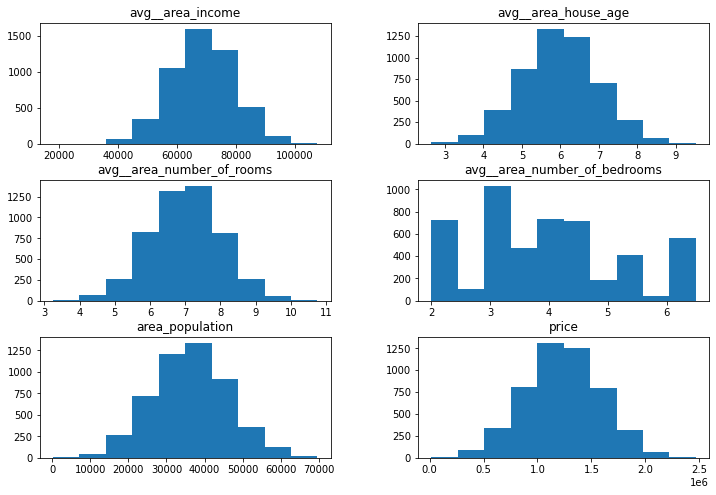

In [143]:
#see distribuation of numeric columns
data.hist(figsize=(12, 8), grid=False)

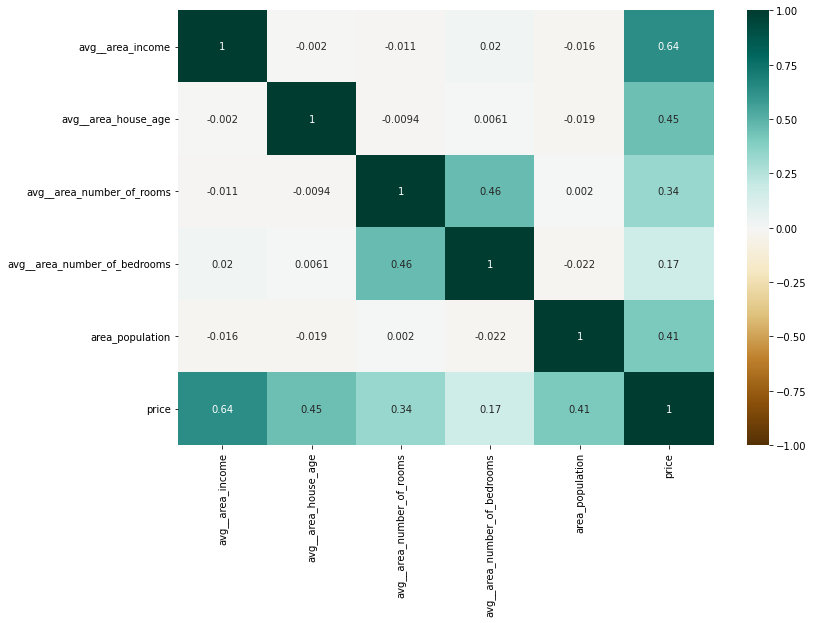

In [144]:
#correlation among variables
plt.figure(figsize=(12, 8))
sns.heatmap(data.corr(), vmin=-1, vmax=1, annot=True, cmap="BrBG")

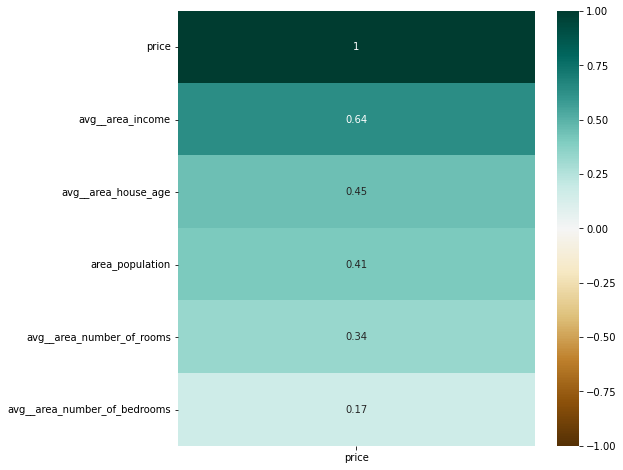

In [145]:
#correlation between features and target
plt.figure(figsize=(8, 8))
sns.heatmap(data.corr()[["price"]].sort_values(by="price", ascending=False), vmin=-1, vmax=1, annot=True, cmap="BrBG")

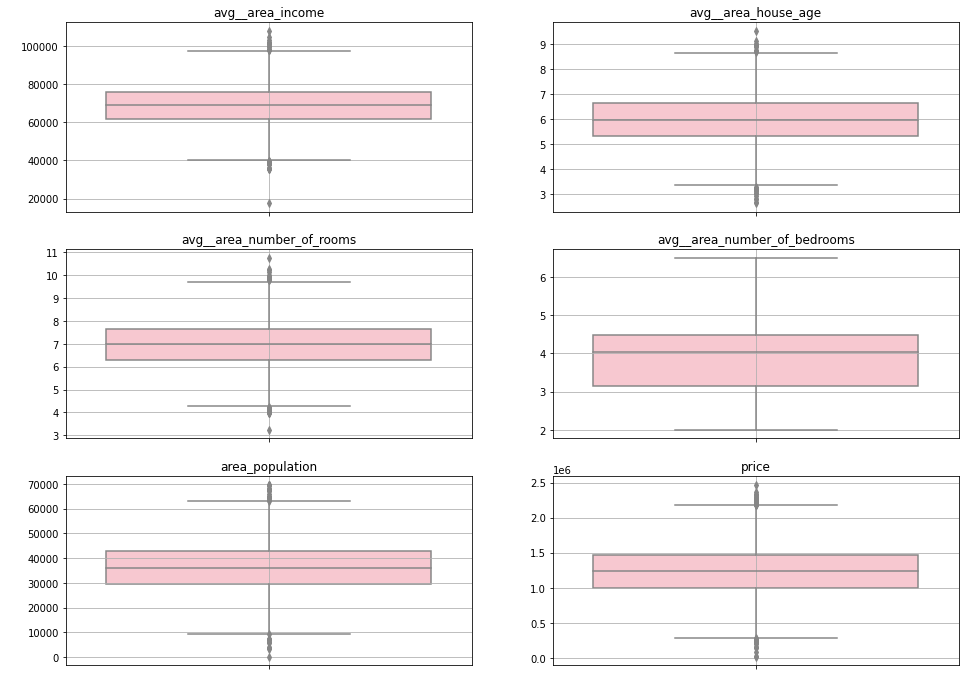

In [146]:
#check outliers
col={'avg__area_income':1, 'avg__area_house_age':2, 'avg__area_number_of_rooms':3,
       'avg__area_number_of_bedrooms':4, 'area_population':5, 'price':6}


fig = plt.figure(figsize=(16,16))
for variable, i in col.items():
  plt.subplot(4, 2, i)
  sns.boxplot(y=data[variable], color="pink", meanline=True)
  plt.title(variable)
  plt.ylabel(' ')
  plt.grid(True)


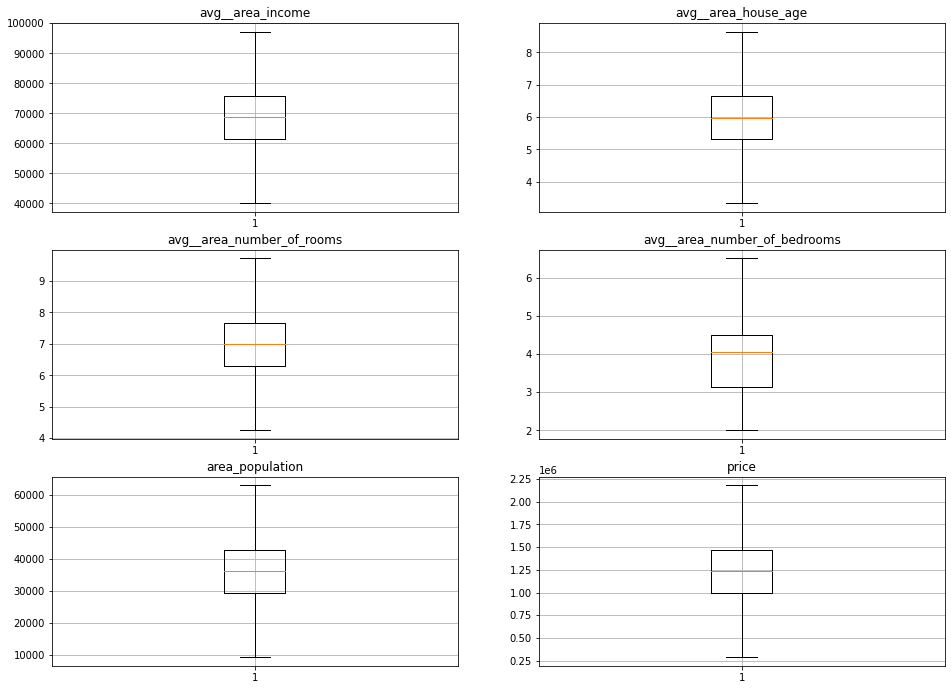

In [147]:
#treat outliers
def outlier_detection(cols):
    Q1,Q3 = np.percentile(cols,[25,75])
    IQR = Q3-Q1
    upper_bound = Q3 + (1.5*IQR)
    lower_bound = Q1 - (1.5*IQR)
    return upper_bound,lower_bound

for cols in col:
   upper_bound,lower_bound = outlier_detection(data[cols])
   data[cols] = np.clip(data[cols],a_min=lower_bound,a_max=upper_bound)

fig = plt.figure(figsize=(16,16))

for variable,i in col.items():
                     plt.subplot(4,2,i)
                     plt.boxplot(data[variable], meanline=True)
                     plt.title(variable)
                     plt.grid(True)

# Splitting the data

In [148]:
X=data.drop("price", axis=1)
y=data.price

In [149]:
y=y.values.reshape(len(y),1)

In [150]:
y

array([[1059033.55787012],
       [1505890.91484695],
       [1058987.98787608],
       ...,
       [1030729.58315229],
       [1198656.87240769],
       [1298950.48026696]])

In [151]:
X_train, X_test, y_train, y_test=train_test_split(X, y, test_size=0.2, shuffle=True, random_state=123)

# Scaling

In [152]:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
X_train[::] = scaler.fit_transform(X_train[::])
X_test[::] = scaler.transform(X_test[::])


# Modeling

In [153]:
regressor=LinearRegression()
regressor.fit(X_train, y_train)
y_pred=regressor.predict(X_test)

In [154]:
regressor.score(X_train, y_train)

0.9163444603082305

In [155]:
regressor.score(X_test, y_test)

0.9167529679800949

#Evaluation

In [156]:
#For calculating Adjusted R^2
n = X_test.shape[0] #sample size
p = X_test.shape[1] #number of predictors

In [157]:
n

1000

In [158]:
p

5

In [159]:
print('R^2 :' , metrics.r2_score(y_test, y_pred))
print('Adjusted R^2 :'  , 1-(1 - metrics.r2_score(y_test, y_pred))*(1000-1)/(1000-5-1))
print("Mean Square Error :", metrics.mean_squared_error(y_test, y_pred))
print("Root Mean Squared Error :", np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

R^2 : 0.9167529679800949
Adjusted R^2 : 0.9163342203341195
Mean Square Error : 10894375521.399712
Root Mean Squared Error : 104376.12524614866


In [160]:
coef=pd.DataFrame(regressor.coef_.reshape(-1, 1), X.columns, columns=["Coefficient"])

In [161]:
coef

,Coefficient
avg__area_income,228187.683250
avg__area_house_age,162545.676891
avg__area_number_of_rooms,119849.574613
avg__area_number_of_bedrooms,1938.382474
area_population,150398.733886


In [162]:
regressor.intercept_

array([1234670.61230464])

In [163]:
df = pd.DataFrame({'Actual': y_test.flatten(), 'Predicted': y_pred.flatten()})
df1 = df.head(25)

In [164]:
df1

,Actual,Predicted
0,8.001462e+05,7.890884e+05
1,7.073451e+05,6.972277e+05
2,1.218264e+06,1.413763e+06
3,1.233484e+06,1.195715e+06
4,5.856086e+05,7.800151e+05
5,1.279280e+06,1.185971e+06
6,1.246830e+06,1.248803e+06
7,9.635319e+05,9.743650e+05
8,1.845630e+06,1.909864e+06
9,1.661120e+06,1.696446e+06


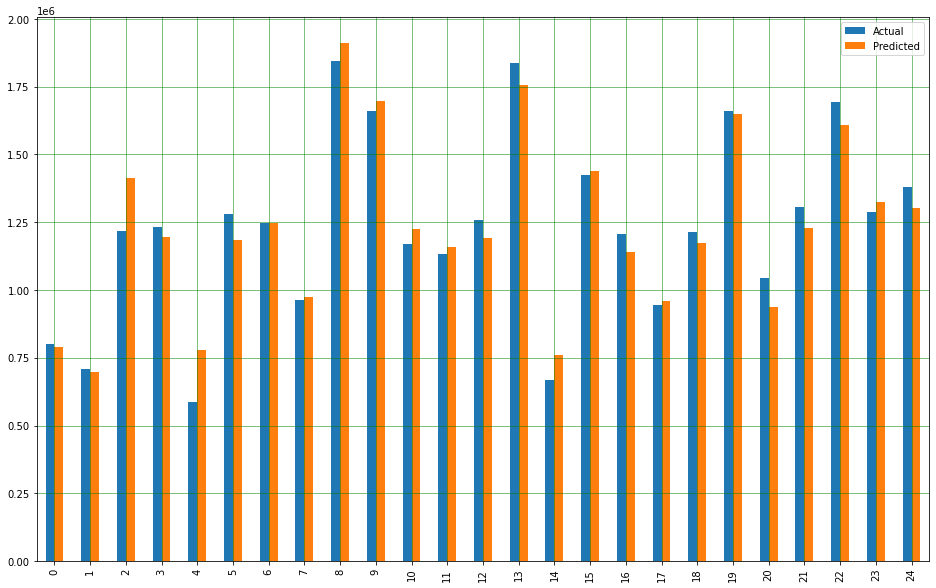

In [165]:
df1 = df.head(25)
df1.plot(kind='bar',figsize=(16,10))
plt.grid(which='major', linestyle='-', linewidth='0.5', color='green')
plt.grid(which='minor', linestyle=':', linewidth='0.5', color='black')
plt.show()